# **Homework 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests, urllib
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
# resp = requests.get(url)
# car_fuel_efficiency_data = resp.content

In [3]:
# csv_file = open('car_fuel_efficiency.csv', 'wb')
# csv_file.write(car_fuel_efficiency_data)

In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## ****Exploratory Data Analysis****

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [7]:
for col in df.columns:
    print(f"For column {col}: {df[col].unique()[:5]} \n")

For column engine_displacement: [170 130 220 210 190] 

For column num_cylinders: [ 3.  5. nan  4.  1.] 

For column horsepower: [159.  97.  78.  nan 140.] 

For column vehicle_weight: [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999] 

For column acceleration: [17.7 17.8 15.1 20.2 14.4] 

For column model_year: [2003 2007 2018 2009 2008] 

For column origin: ['Europe' 'USA' 'Asia'] 

For column fuel_type: ['Gasoline' 'Diesel'] 

For column drivetrain: ['All-wheel drive' 'Front-wheel drive'] 

For column num_doors: [ 0.  2. -1.  1. nan] 

For column fuel_efficiency_mpg: [13.23172891 13.68821744 14.246341   16.9127356  12.48836912] 



In [8]:
usedFeats = df[['engine_displacement', 'horsepower', 'vehicle_weight', 
                'model_year', 'fuel_efficiency_mpg']]

### Distribution of fuel_efficiency_mpg 

<Figure size 1500x800 with 0 Axes>

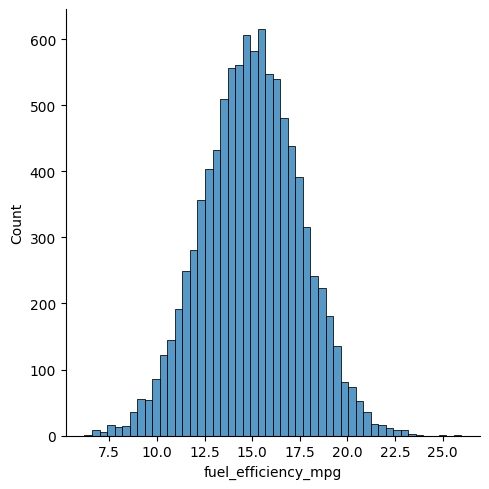

In [10]:
plt.figure(figsize=(15, 8))
sns.displot(usedFeats.fuel_efficiency_mpg , bins=50)

### Missing Values

In [12]:
usedFeats.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Median (50% Percentile) for variable 'horsepower'?

In [24]:
usedFeats.horsepower.median(skipna=True)

np.float64(149.0)

### Prepare and split the dataset

In [25]:
def trainValidateTest_Shuffle(df: pd.DataFrame, partitions: float, seed: np.integer):
    """
        This is a function use for splitting dataset into train, validation, and test.
        Train: 
        Validation: 
        Test: 
    """
    
    n = len(df)
    n_val = int(n * partitions)
    n_test = int(n * partitions)
    n_train = n - n_val - n_test
    
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    return df_train, df_val, df_test

In [26]:
trainSet, valSet, testSet = trainValidateTest_Shuffle(usedFeats, 0.2, 42)

## **Comparison of Mean Imputation and Zero Imputation**